In [287]:
import numpy as np
import pandas as pd
import math
import statistics as stats
import matplotlib.pyplot as plt
from scipy.stats import norm

In [288]:
np_array_btc = np.load('values_squad3.npy')
df_btc = pd.DataFrame(np_array_btc, columns=['valores'])

In [289]:
#plt.scatter(df_btc.index, df_btc, s=1, c='r');

In [290]:
#plt.hist(df_btc, density= True, bins=10);

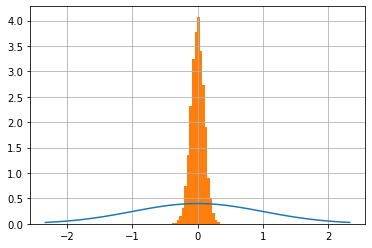

In [291]:
normal_variable = norm()
normal_values = normal_variable.rvs(size=100000)
x = np.linspace(normal_variable.ppf(0.01), normal_variable.ppf(0.99), 100)

plt.plot(x, normal_variable.pdf(x))
plt.hist(df_btc, density=True, bins=20)
plt.grid()
plt.show()
#leptocúrtica simétrica

In [292]:
mean_ = float(np.mean(df_btc,axis=0))
std_ = float(np.std(df_btc,axis=0))
IC1 = mean_ + std_
IC2 = mean_ - std_

print('Para um intervalo de confiança de 68% nossos valores estariam entre {}{} e {}{} com uma média de{}{}{}.'.format('\033[91m', round(IC1,4), round(IC2,4),'\033[0m', '\033[1m', round(mean_,7),'\033[0m'))
print('Para um intervalo de confiança de 95% nossos valores estariam entre {}{} e {}{} com uma média de{}{}{}.'.format('\033[91m', round(IC1+std_,4), round(IC2-std_,4),'\033[0m', '\033[1m', round(mean_,7),'\033[0m'))
print('Para um intervalo de confiança de 99.7% nossos valores estariam entre {}{} e {}{} com uma média de{}{}{}.'.format('\033[91m', round(IC1+2*std_,4), round(IC2-2*std_,4),'\033[0m','\033[1m', round(mean_,7),'\033[0m'))


Para um intervalo de confiança de 68% nossos valores estariam entre 0.0996 e -0.0996 com uma média de-8.4e-06.
Para um intervalo de confiança de 95% nossos valores estariam entre 0.1992 e -0.1992 com uma média de-8.4e-06.
Para um intervalo de confiança de 99.7% nossos valores estariam entre 0.2988 e -0.2988 com uma média de-8.4e-06.


Text(0.5, 1.0, 'NORMAL CUMULATIVE DENSITY FUNC.')

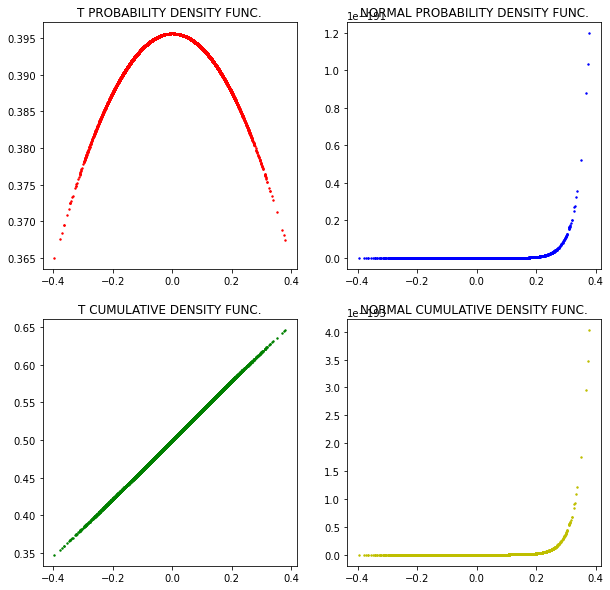

In [322]:
from scipy.stats import t

fig, (axs1,axs2) = plt.subplots(2,2, figsize=(10,10))
axs1[0].scatter(np_array_btc, t.pdf(np_array_btc,30),c='r', s=2)
axs2[0].scatter(np_array_btc, t.cdf(np_array_btc,30), c='g', s=2)
axs1[1].scatter(np_array_btc, norm.pdf(np_array_btc,30),c='b', s=2)
axs2[1].scatter(np_array_btc, norm.cdf(np_array_btc,30),c='y',s=2)
axs1[0].set_title('T PROBABILITY DENSITY FUNC.')
axs2[0].set_title('T CUMULATIVE DENSITY FUNC.')
axs1[1].set_title('NORMAL PROBABILITY DENSITY FUNC.')
axs2[1].set_title('NORMAL CUMULATIVE DENSITY FUNC.')


In [296]:
def agrupamento(np_array, index, sort_array= False):
    if sort_array == True:
        np_array = np.sort(np_array)
    lista_media_aleatoria = []
    for i in range(index,len(np_array)+1, index):
        agrupamento = np_array[i-index:i]
        media_agrupamentos = np.mean(agrupamento)
        lista_media_aleatoria.append(media_agrupamentos)

    return pd.DataFrame(lista_media_aleatoria, columns=['médias agrupamento'])

In [299]:
#analisando os dados em ordem crescente
#Visualizando a distribuição dos dados
df_lista_media_sorted = agrupamento(np_array_btc, 1, True)

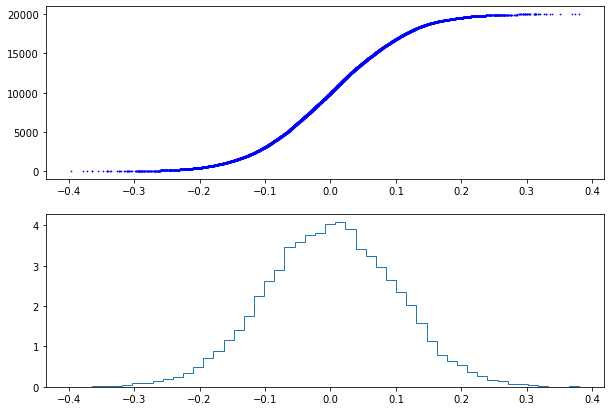

In [309]:
fig, (axs1,axs2) = plt.subplots(2,1, figsize=(10,7))
axs1.scatter(df_lista_media_sorted,df_lista_media_sorted.index, s=0.5, c='b');
axs2.hist(df_lista_media_sorted, density=True, bins=50, histtype='step');

In [297]:
#analisando os dados em ordem aleatória
df_lista_media_aleatoria1 = agrupamento(np_array_btc,4) 
df_lista_media_aleatoria2 = agrupamento(np_array_btc,16) 
df_lista_media_aleatoria3 = agrupamento(np_array_btc,64) 

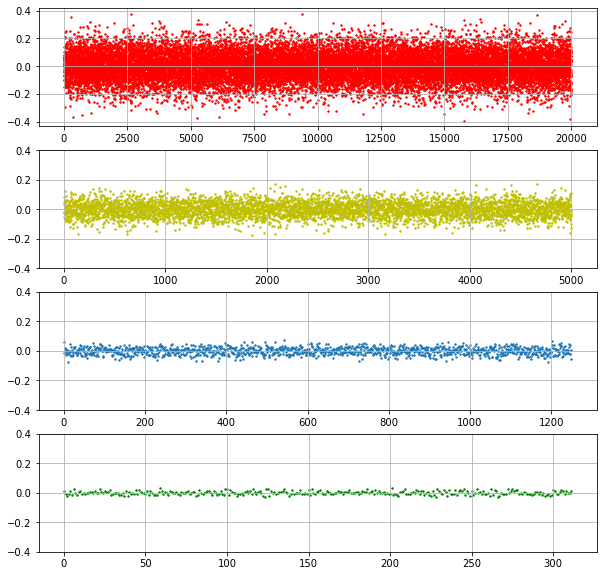

In [312]:
fig, (axs1,axs2,axs3,axs4) = plt.subplots(4,1, figsize=(10,10))
axs1.scatter(df_btc.index, df_btc, s=2, c='r')
axs2.scatter(df_lista_media_aleatoria1.index, df_lista_media_aleatoria1.values, s=2,c='y')
axs3.scatter(df_lista_media_aleatoria2.index, df_lista_media_aleatoria2.values, s=2)
axs4.scatter(df_lista_media_aleatoria3.index, df_lista_media_aleatoria3.values, s=2, c='g')
axs2.set_ylim(-0.4,0.4)
axs3.set_ylim(-0.4,0.4)
axs4.set_ylim(-0.4,0.4);
axs1.grid()
axs2.grid()
axs3.grid()
axs4.grid()